In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("disease_detection_dataset.csv")

In [5]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SerialNo   490 non-null    int64  
 1   Timestamp  490 non-null    object 
 2   HeartRate  490 non-null    int64  
 3   SpO2       490 non-null    int64  
 4   Glucose    490 non-null    int64  
 5   disease    0 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 23.1+ KB


SerialNo       0
Timestamp      0
HeartRate      0
SpO2           0
Glucose        0
disease      490
dtype: int64

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed', dayfirst=True, errors='coerce')

In [11]:
df = df[(df['HeartRate'] >= 40) & (df['HeartRate'] <= 200)]

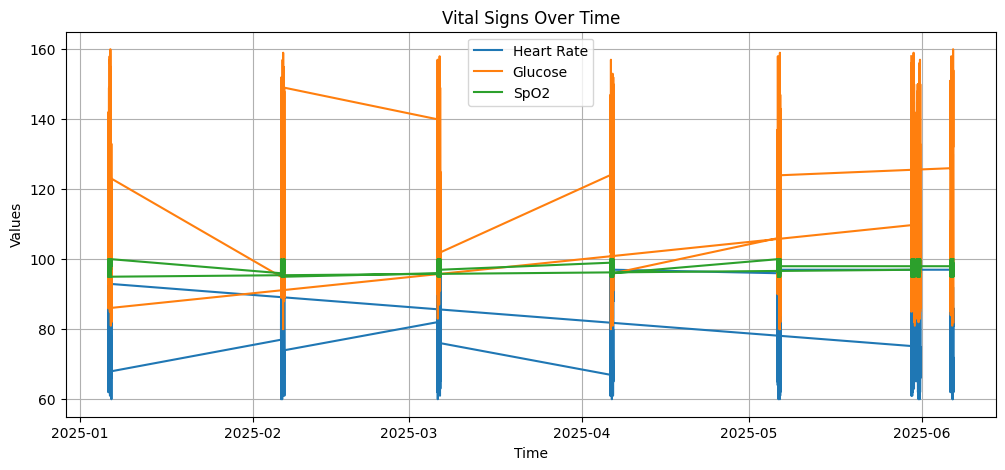

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['HeartRate'], label='Heart Rate')
plt.plot(df['Timestamp'], df['Glucose'], label='Glucose')
plt.plot(df['Timestamp'], df['SpO2'], label='SpO2')
plt.legend()
plt.title('Vital Signs Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()

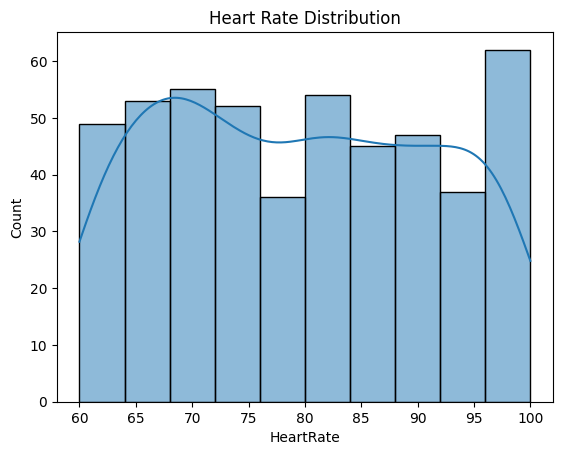

In [13]:
sns.histplot(df['HeartRate'], kde=True)
plt.title('Heart Rate Distribution')
plt.show()

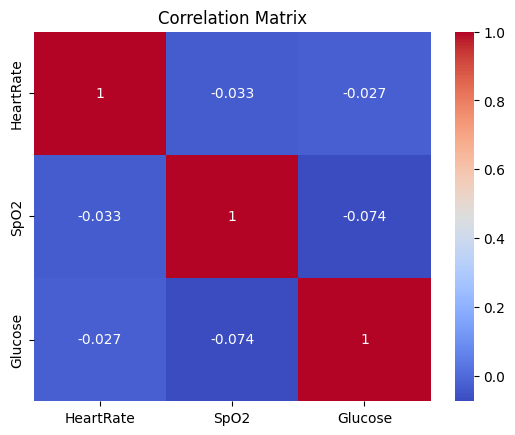

In [14]:
corr = df[['HeartRate', 'SpO2', 'Glucose']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
from scipy.stats import zscore

z_scores = df[['HeartRate', 'SpO2', 'Glucose']].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)
anomalies = df[outliers]
print(anomalies)


Empty DataFrame
Columns: [SerialNo, Timestamp, HeartRate, SpO2, Glucose, disease]
Index: []


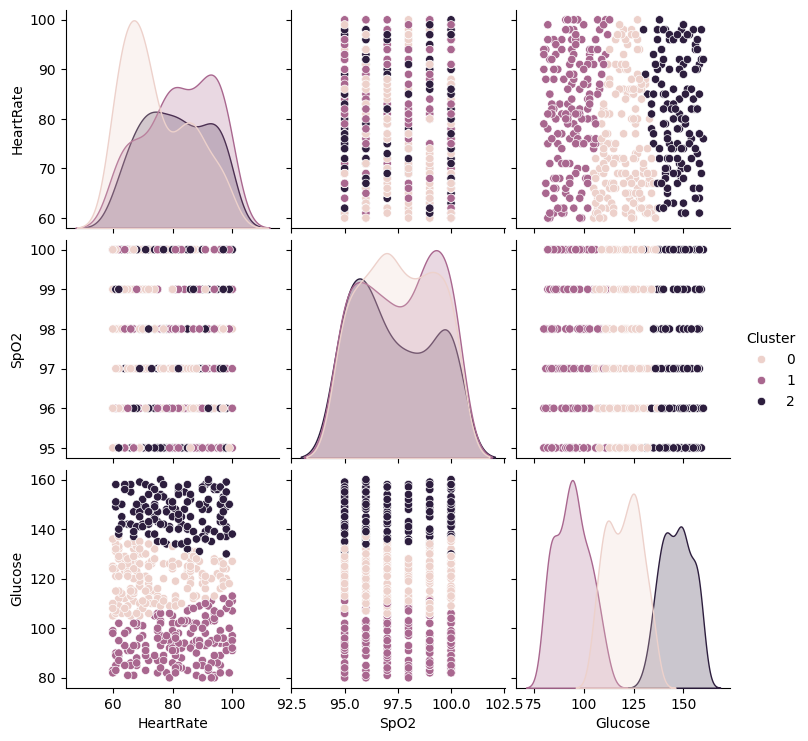

In [16]:
from sklearn.cluster import KMeans
X = df[['HeartRate', 'SpO2', 'Glucose']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

sns.pairplot(df, hue='Cluster', vars=['HeartRate', 'SpO2', 'Glucose'])
plt.show()


In [18]:
df.to_csv("cleaned_health_data.csv", index=False)